In [1]:
from data_pipeline import *
from syntren import *
import matplotlib.pyplot as plt
from utils import *
from scipy.cluster.hierarchy import linkage, cophenet, dendrogram

In [2]:
root_gene = 'CRP'
minimum_evidence = 'weak'
max_depth = np.inf
r_expr, gene_symbols, sample_names = load_data(root_gene=root_gene,
                                     minimum_evidence=minimum_evidence,
                                     max_depth=max_depth)

# Split data into train and test sets
train_idxs, test_idxs = split_train_test(sample_names)
expr_train = r_expr[train_idxs, :]
expr_test = r_expr[test_idxs, :]
nb_train, nb_genes = expr_train.shape

# Obtain SynTReN data
s_expr, s_gene_symbols = syntren_results(minimum_evidence='Weak', nb_background=0)
s_expr = s_expr[:nb_train, :]

# Align synthetic gene symbols
idxs = [s_gene_symbols.index(gene) for gene in gene_symbols]
s_expr = s_expr[:, idxs]
assert (np.array(s_gene_symbols)[idxs] == np.array(gene_symbols)).all()

# Adjust scale of SynTReN data
r_min = r_expr.min(axis=0)
r_max = r_expr.max(axis=0)
# s_expr = s_expr*(r_max - r_min) + r_min
# s_expr = s_expr*7 + 5
mean = np.mean(s_expr, axis=0)
std = np.std(s_expr, axis=0)
s_expr = (s_expr - mean)/std

mean = np.mean(r_expr, axis=0)
std = np.std(r_expr, axis=0)
s_expr = s_expr * std + mean

# Clip outliers
r_min = r_expr.min()
r_max = r_expr.max()
s_expr[s_expr < r_min] = r_min
s_expr[s_expr > r_max] = r_max

Found 4297 genes in datafile
Found 1208 genes in CRP regulatory network
4297 genes not in gene subset. Selecting 1076 genes ...


# Intensity histograms

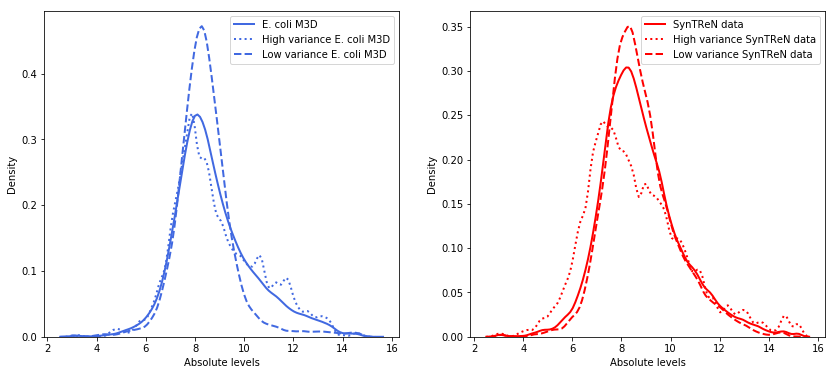

In [3]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_intensities(expr_train)
plt.subplot(122)
plot_intensities(s_expr, dataset_name='SynTReN data', color='red');

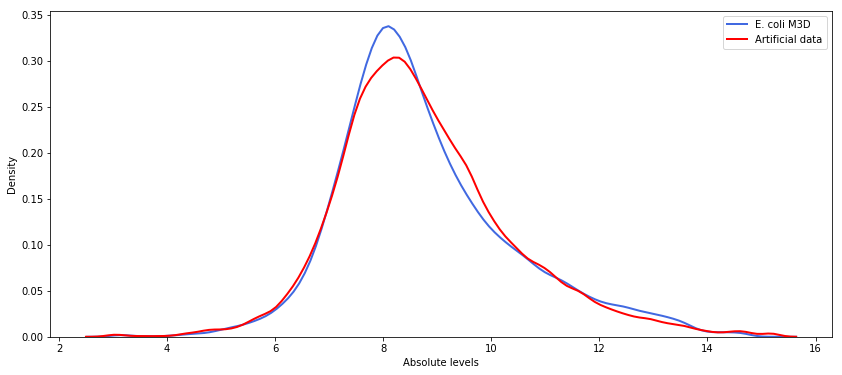

In [4]:
plt.figure(figsize=(14, 6))
ax = plot_intensities(expr_train, plot_quantiles=False)
plot_intensities(s_expr, dataset_name='Artificial data', color='red', plot_quantiles=False, ax=ax);

# Gene ranges histograms

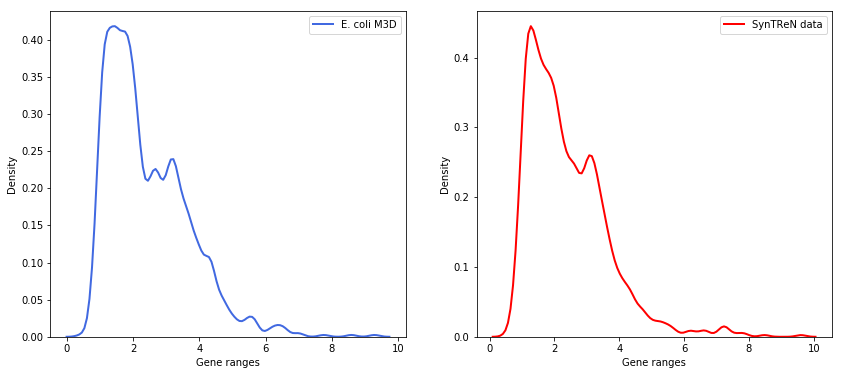

In [5]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_gene_ranges(r_expr)
plt.subplot(122)
plot_gene_ranges(s_expr, dataset_name='SynTReN data', color='red');

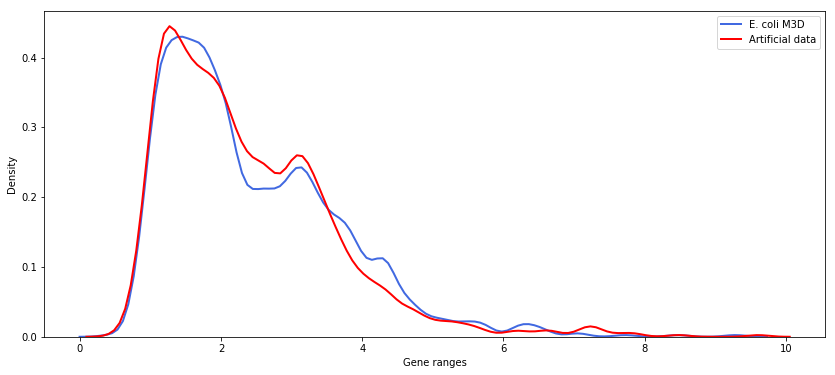

In [6]:
plt.figure(figsize=(14, 6))
ax = plot_gene_ranges(expr_train)
plot_gene_ranges(s_expr, dataset_name='Artificial data', color='red', ax=ax);

# TF-TG histogram (using synthetic background distribution)

In [7]:
r_tf_tg_corr, r_tg_tg_corr = compute_tf_tg_corrs(expr_train, gene_symbols)
s_tf_tg_corr, s_tg_tg_corr = compute_tf_tg_corrs(s_expr, gene_symbols)
r_back_corr = correlations_list(expr_train, expr_train)
s_back_corr = correlations_list(s_expr, s_expr)

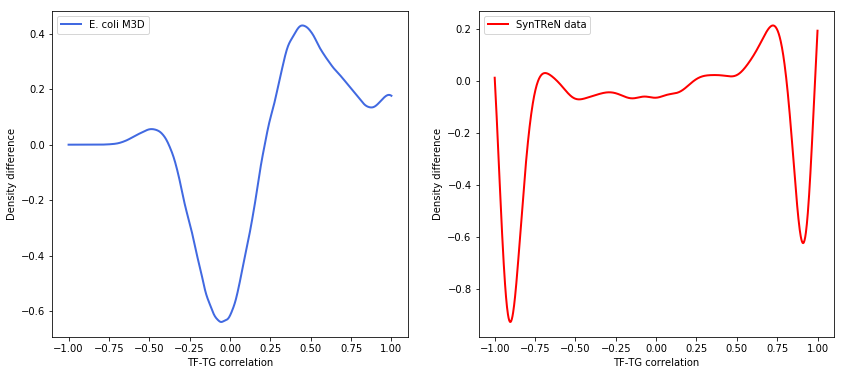

In [8]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_difference_histogram(r_tf_tg_corr, r_back_corr, 'TF-TG correlation')
plt.subplot(122)
plot_difference_histogram(s_tf_tg_corr, s_back_corr, 'TF-TG correlation', dataset_name='SynTReN data', color='red');

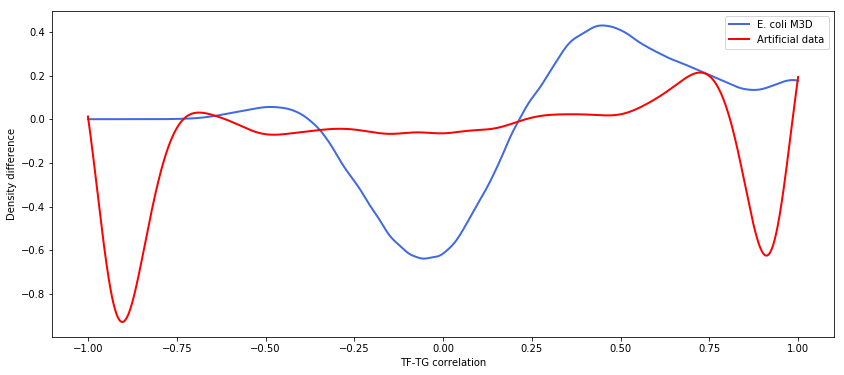

In [9]:
plt.figure(figsize=(14, 6))
ax = plot_difference_histogram(r_tf_tg_corr, r_back_corr, 'TF-TG correlation')
plot_difference_histogram(s_tf_tg_corr, s_back_corr, 'TF-TG correlation', dataset_name='Artificial data', color='red', ax=ax);

# TF-TG histogram (using real background distribution)

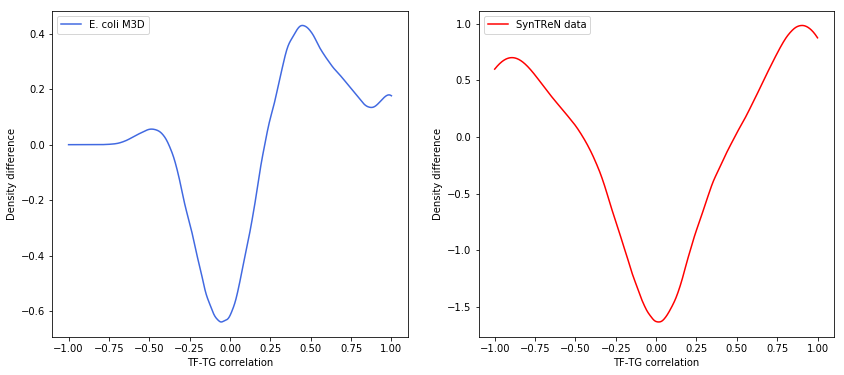

In [47]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_difference_histogram(r_tf_tg_corr, r_back_corr, 'TF-TG correlation')
plt.subplot(122)
plot_difference_histogram(s_tf_tg_corr, r_back_corr, 'TF-TG correlation', dataset_name='SynTReN data', color='red');

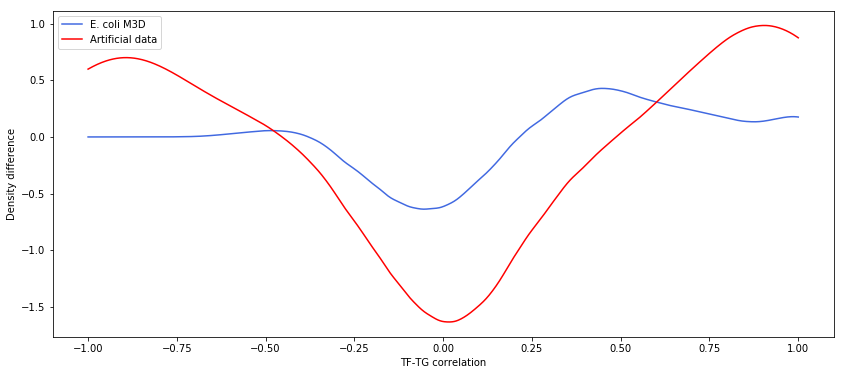

In [48]:
plt.figure(figsize=(14, 6))
ax = plot_difference_histogram(r_tf_tg_corr, r_back_corr, 'TF-TG correlation')
plot_difference_histogram(s_tf_tg_corr, r_back_corr, 'TF-TG correlation', dataset_name='Artificial data', color='red', ax=ax); 

# TG-TG histogram (using synthetic background distribution)

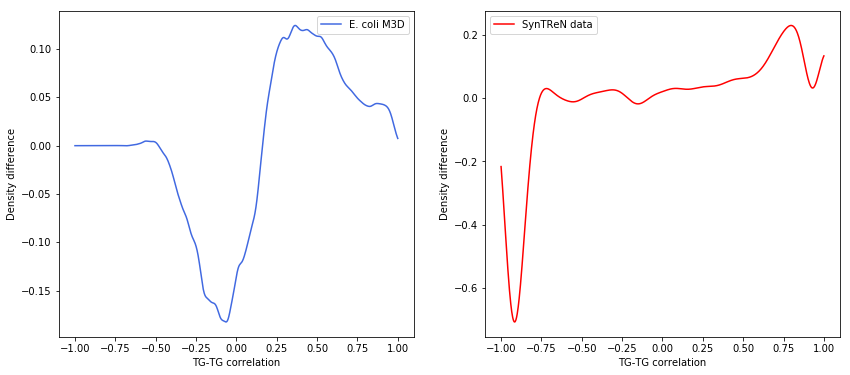

In [49]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_difference_histogram(r_tg_tg_corr, r_back_corr, 'TG-TG correlation')
plt.subplot(122)
plot_difference_histogram(s_tg_tg_corr, s_back_corr, 'TG-TG correlation', dataset_name='SynTReN data', color='red');

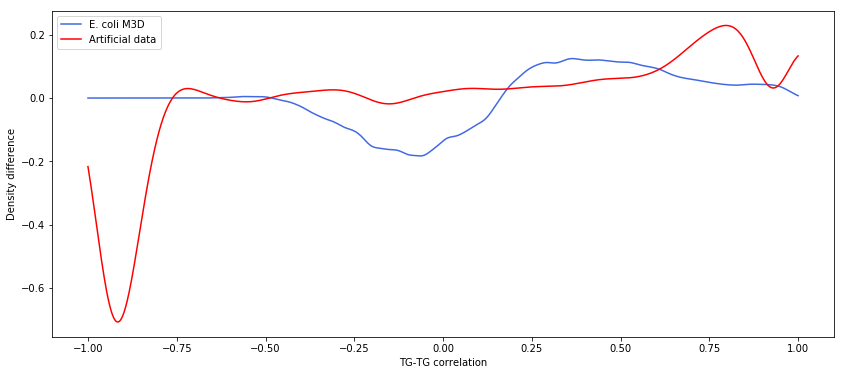

In [50]:
plt.figure(figsize=(14, 6))
ax = plot_difference_histogram(r_tg_tg_corr, r_back_corr, 'TG-TG correlation')
plot_difference_histogram(s_tg_tg_corr, s_back_corr, 'TG-TG correlation', dataset_name='Artificial data', color='red', ax=ax);

# TG-TG histogram (using real background distribution)

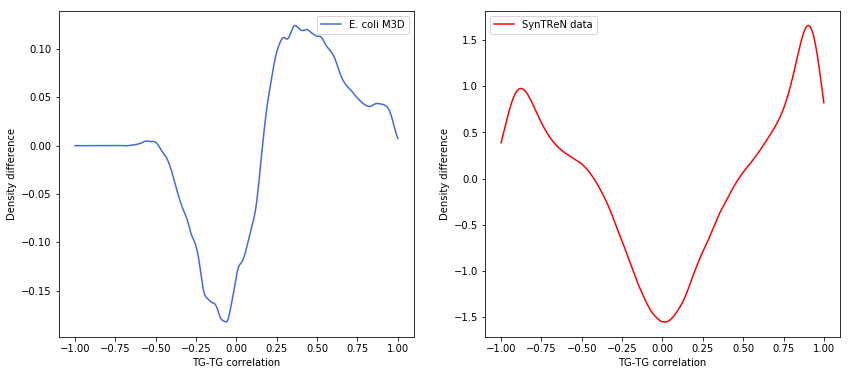

In [51]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_difference_histogram(r_tg_tg_corr, r_back_corr, 'TG-TG correlation')
plt.subplot(122)
plot_difference_histogram(s_tg_tg_corr, r_back_corr, 'TG-TG correlation', dataset_name='SynTReN data', color='red');

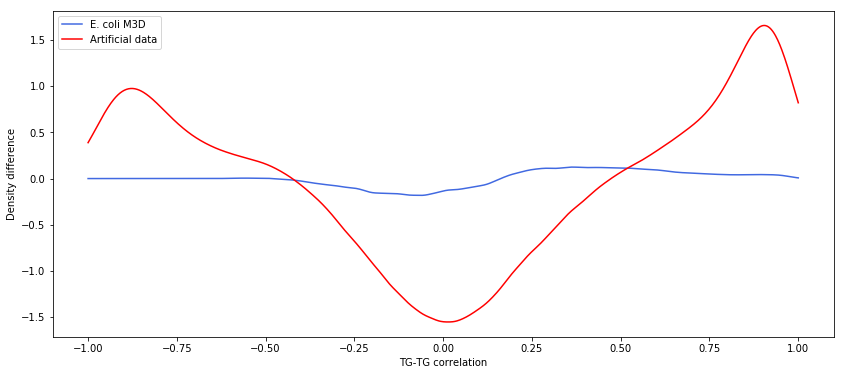

In [52]:
plt.figure(figsize=(14, 6))
ax = plot_difference_histogram(r_tg_tg_corr, r_back_corr, 'TG-TG correlation')
plot_difference_histogram(s_tg_tg_corr, r_back_corr, 'TG-TG correlation', dataset_name='Artificial data', color='red', ax=ax);

# Background distributions

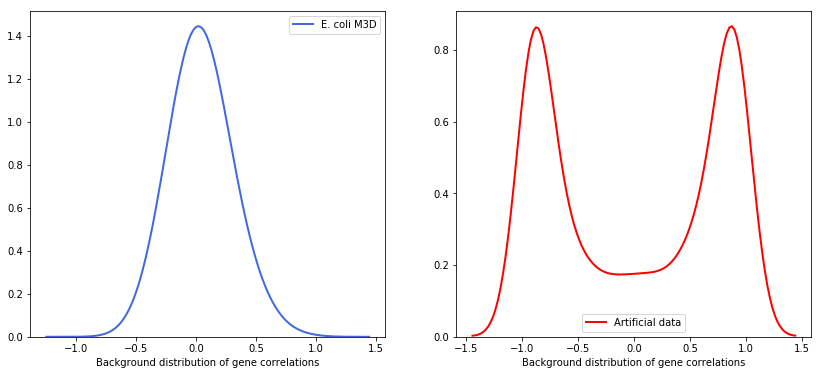

In [53]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_distribution(r_back_corr, xlabel='Background distribution of gene correlations')
plt.subplot(122)
plot_distribution(s_back_corr, xlabel='Background distribution of gene correlations', label='Artificial data', color='red');

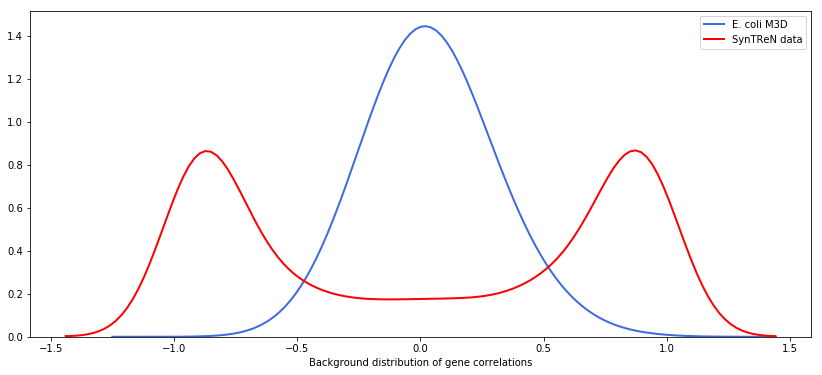

In [54]:
plt.figure(figsize=(14, 6))
ax = plot_distribution(r_back_corr, xlabel='Background distribution of gene correlations')
plot_distribution(s_back_corr, xlabel='Background distribution of gene correlations', label='SynTReN data', color='red');

# TF activity histogram

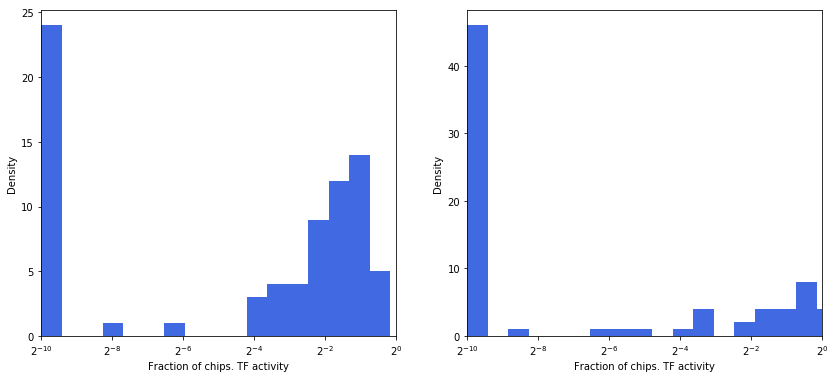

In [55]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_tf_activity_histogram(expr_train, gene_symbols)
plt.subplot(122)
plot_tf_activity_histogram(s_expr, gene_symbols);

# Cophenetic coefficients

In [68]:
gamma_dx_dz, gamma_dx_tx, gamma_dz_tz, gamma_tx_tz = gamma_coefficients(expr_train, s_expr)
print('Gamma(D^X, D^Z): {}'.format(gamma_dx_dz))
print('Gamma(D^X, T^X): {}'.format(gamma_dx_tx))
print('Gamma(D^Z, T^Z): {}'.format(gamma_dz_tz))
print('Gamma(T^X, T^Z): {}'.format(gamma_tx_tz))

r_tf_tg_corr, r_tg_tg_corr = compute_tf_tg_corrs(expr_train, gene_symbols, flat=False)
s_tf_tg_corr, s_tg_tg_corr = compute_tf_tg_corrs(s_expr, gene_symbols, flat=False)
psi_dx_dz = psi_coefficient(r_tf_tg_corr, s_tf_tg_corr)
theta_dx_dz = theta_coefficient(r_tg_tg_corr, s_tg_tg_corr)
print('Psi(D^X, D^Z): {}'.format(psi_dx_dz))
print('Theta(D^X, D^Z): {}'.format(theta_dx_dz))


Gamma(D^X, D^Z): 0.02378117905270423
Gamma(D^X, T^X): 0.5308278489633552
Gamma(D^Z, T^Z): 0.9177055308203876
Gamma(T^X, T^Z): 0.02536746342185752
Psi(D^X, D^Z): 0.15218853025093243
Theta(D^X, D^Z): 0.13793261405160248
